In [3]:
#
# author: F. Coppo
# description: NYC 311 data ingest and analysis
# 

import pandas as pd
import matplotlib.pyplot as plt 

"""
INGEST DATA
"""
# filename = https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
filename = "fhrw-4uyv.csv"   # this is the complete file
headers = ['created_date','unique_key','complaint_type','incident_zip','incident_address','street_name','address_type','city','resolution_description','borough','latitude','longitude','closed_date','location_type','status']
df = pd.read_csv(filename, usecols = headers)

In [3]:
# Quiz

In [4]:
%matplotlib inline

# total number of General Construction complaints:
general = df[df["complaint_type"]=="GENERAL CONSTRUCTION"]["unique_key"].count()
print("The number of General Construction complaints is %s" % general)					# 500863

# create new column with year
df['year'] = df['created_date'].str[:4]

The number of General Construction complaints is 500863


In [5]:
# compliant that should be addressed first (till 31st Dec 2018)
compliantUntilThe2019=df[df["year"] < '2019']									# filter by year
print("compliant before 2019:")
compliantUntilThe2019['complaint_type'].value_counts()							# count the occurences: heat/hot water and heating at the top

compliant before 2019:


HEAT/HOT WATER            1023788
HEATING                    887869
PLUMBING                   673406
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       390908
PAINT - PLASTER            361257
PAINT/PLASTER              311076
ELECTRIC                   289345
NONCONST                   260890
DOOR/WINDOW                179573
WATER LEAK                 167900
GENERAL                    132207
FLOORING/STAIRS            122869
APPLIANCE                  101944
HPD Literature Request      51604
SAFETY                      44088
OUTSIDE BUILDING             6532
ELEVATOR                     5620
CONSTRUCTION                 5078
Unsanitary Condition          141
General                        70
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Safety                          8
Name: complaint_type, dtype: int64

In [ ]:

# QUESTION 1: Which type of complaints should the Department of Housing Preservation and Development of New York City focus on first? </h1>


the most frequent complaint is ['HEAT/HOT WATER'] with 1271768 occurences
The same result is showed in the following bar plot:



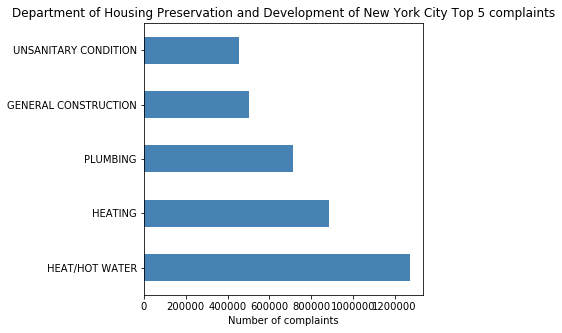

In [6]:
complaints = df['complaint_type'].value_counts();
complaints											# heat/hot water and heating at the top
print("the most frequent complaint is %s with %s occurences" % (df['complaint_type'].value_counts()[:1].index.tolist(), complaints.max() ) )

# BAR PLOT
print("The same result is showed in the following bar plot:\n")
df_top5 = complaints.head()
df_top5.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of complaints')
plt.title('Department of Housing Preservation and Development of New York City Top 5 complaints')	
plt.show() 

In [ ]:

# The complaints structure and the bar plot show that the top five complaints are heat/hot water, heating, plumbing, general contruction and sanitary condition. </h1>


In [ ]:

# Question #2: </h1>
# Should the Department of Housing Preservation and Development of New York City focus on any particular set ofboroughs, ZIP codes,  or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?</b>


In [7]:
# Example:  find the total number of specific complaints for a specific address
complaint = 'HEATING'
address = '1230 BROADWAY'
dfTmp = df[df["complaint_type"]==complaint]
print("filtering for address: %s %s complaints at %s" % (dfTmp[dfTmp["incident_address"]==address]["unique_key"].count(), complaint, address) )

filtering for address: 32 HEATING complaints at 1230 BROADWAY


In [8]:
# Create a dataset with only specific type of complaints you identified in response to Question 1
complaint2 = 'HEAT/HOT WATER'

# HEATER + HEAT/HOT WATER dataset
subsetDataFrame = df[df['complaint_type'].isin([complaint, complaint2]) ]
print("dataframe with only %s and %s complaint" % (complaint, complaint2))
subsetDataFrame.head(10)

dataframe with only HEATING and HEAT/HOT WATER complaint


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,year
1,2020-02-17T16:48:19.000,45635524,HEAT/HOT WATER,10034.0,252 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.866148,-73.919071,NaN,RESIDENTIAL BUILDING,Open,2020
2,2020-02-17T08:57:26.000,45633516,HEAT/HOT WATER,10459.0,1161 HOE AVENUE,HOE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.827633,-73.890905,NaN,RESIDENTIAL BUILDING,Open,2020
4,2020-02-17T11:43:25.000,45633951,HEAT/HOT WATER,10472.0,1105 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.826737,-73.873931,NaN,RESIDENTIAL BUILDING,Open,2020
5,2020-02-17T18:01:32.000,45633494,HEAT/HOT WATER,10003.0,77 2 AVENUE,2 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.726486,-73.989216,NaN,RESIDENTIAL BUILDING,Open,2020
9,2020-02-17T12:12:46.000,45633480,HEAT/HOT WATER,11372.0,94-06 34 ROAD,34 ROAD,ADDRESS,Jackson Heights,The following complaint conditions are still o...,QUEENS,40.753724,-73.873358,NaN,RESIDENTIAL BUILDING,Open,2020
10,2020-02-17T16:49:35.000,45634745,HEAT/HOT WATER,11226.0,170 EAST 17 STREET,EAST 17 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.646437,-73.963492,NaN,RESIDENTIAL BUILDING,Open,2020
12,2020-02-17T20:13:40.000,45637087,HEAT/HOT WATER,10034.0,252 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.866148,-73.919071,NaN,RESIDENTIAL BUILDING,Open,2020
13,2020-02-17T18:48:11.000,45638532,HEAT/HOT WATER,11375.0,103-11 68 DRIVE,68 DRIVE,ADDRESS,Forest Hills,The complaint you filed is a duplicate of a co...,QUEENS,40.723974,-73.850711,NaN,RESIDENTIAL BUILDING,Open,2020
17,2020-02-17T02:20:37.000,45635445,HEAT/HOT WATER,10029.0,1265 PARK AVENUE,PARK AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.787632,-73.951758,NaN,RESIDENTIAL BUILDING,Open,2020
19,2020-02-17T13:54:10.000,45636216,HEAT/HOT WATER,10460.0,1574 BEACH AVENUE,BEACH AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.839553,-73.867366,2020-02-17T18:13:18.000,RESIDENTIAL BUILDING,Closed,2020


In [ ]:
# starting to identify particular set of boroughs, ZIP codes, or street

In [ ]:
# Zip code

In [9]:
print("top incident zip with %s and %s complaint" % (complaint, complaint2))
subsetDataFrame['incident_zip'].value_counts()

top incident zip with HEATING and HEAT/HOT WATER complaint


11226.0    69396
10467.0    66371
10458.0    65657
10468.0    58512
10453.0    58116
           ...  
10045.0        1
10103.0        1
10112.0        1
10129.0        1
12345.0        1
Name: incident_zip, Length: 193, dtype: int64

In [ ]:
# Street Name

In [10]:
print("the Street with most (%s %s complaint) is %s with %s occurences" % (complaint, complaint2, subsetDataFrame['street_name'].value_counts()[:1].index.tolist(), subsetDataFrame['street_name'].value_counts().max() ) )
subsetDataFrame['street_name'].value_counts()

the Street with most (HEATING HEAT/HOT WATER complaint) is ['GRAND CONCOURSE'] with 38095 occurences


GRAND CONCOURSE      38095
BROADWAY             24554
OCEAN AVENUE         18846
MORRIS AVENUE        16456
ARDEN STREET         15980
                     ...  
DAMON ST                 1
SOUTH CONDUIT AVE        1
4 AVE                    1
PERRY PLACE              1
WALTON ROAD              1
Name: street_name, Length: 6033, dtype: int64

In [ ]:
# Borough

In [11]:
print("the Borough with most (%s %s complaint) is %s with %s occurences" % (complaint, complaint2, subsetDataFrame['borough'].value_counts()[:1].index.tolist(), subsetDataFrame['borough'].value_counts().max() ) )
subsetDataFrame['borough'].value_counts()

the Borough with most (HEATING HEAT/HOT WATER complaint) is ['BRONX'] with 609975 occurences


BRONX            609975
BROOKLYN         577728
MANHATTAN        425281
Unspecified      282917
QUEENS           245288
STATEN ISLAND     18448
Name: borough, dtype: int64

In [ ]:
# bar plot of top 5 borough with HEATING/HEAT/HOT WATER occurrences

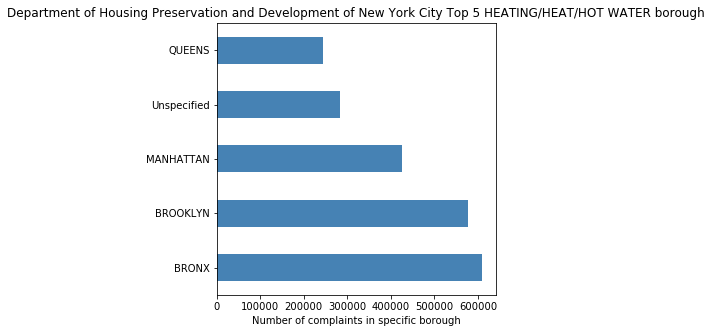

In [12]:
barPlotBorough = subsetDataFrame['borough'].value_counts();
df_top5Borough = barPlotBorough.head()
df_top5Borough.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of complaints in specific borough')
plt.title('Department of Housing Preservation and Development of New York City Top 5 HEATING/HEAT/HOT WATER borough')	
plt.show()

In [35]:
# MAP
!conda install -c conda-forge folium=0.5.0 --yes

import folium
from folium.plugins import HeatMap

def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed and imported!


In [ ]:
# HEAT MAP OF ALL COMPLAINTS:

In [22]:
base_mapAll = generateBaseMap()
HeatMap(data=df[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=9).add_to(base_mapAll)
base_mapAll.save("ny_311_heatmap_All.html")

In [ ]:
# top 2 borough [BRONX, BROOKLYN] and top street name [GRAND CONCOURSE, BROADWAY] dataset

In [23]:
filterBorough = subsetDataFrame['borough'].isin(subsetDataFrame['borough'].value_counts()[:2].index.tolist())
filterStreet = subsetDataFrame['street_name'].isin(subsetDataFrame['street_name'].value_counts()[:2].index.tolist()) 
subsetDataFrameMap = subsetDataFrame[filterBorough | filterStreet]

In [ ]:
# MAP [only HEAT/HEATING compliant in the top 2 borough and top 2 street name]	

In [24]:
base_map = generateBaseMap()
HeatMap(data=subsetDataFrameMap[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=9).add_to(base_map)
base_map.save("ny_311_heatmap_HEATER_HEAT_HOT_WATER.html")

In [ ]:
# comparision between the two .html map is useful to show the region where HOT WATER, HEAT, HEATING compliant are more frequent.

In [45]:
# print heatmap with only first 100000 sample
subsetDataFrameMap100k = subsetDataFrameMap.head(100000)
base_map = generateBaseMap()
HeatMap(data=subsetDataFrameMap100k[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=6).add_to(base_map)
base_map

In [ ]:
# CONCLUSION:
# For the specific type of complaints you identified in response to Question 1 
# (HEATING, HEAT/HOT WATER), the focus should be on following area:

# Borough: BRONX, BROOKLYN, MANHATTAN

# Street Name: GRAND CONCOURSE, BROADWAY, OCEAN AVENUE 

# Zip Code: 11226.0, 10467.0, 10458.0